In [2]:
# set up my import statements


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I have my imports from the mixtend library, mlxtend gives us classes and functions that allow us to extract association rules from the 
# market baskets I will be analyzing (along with run the Apriori algorithim)

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
# the data that I will be using within this notebook will be the data that I had analyzed, gathered, and organized (DataExploration notebook)
# chart displays items sold together in the same invoice
items_per_transaction = pd.read_csv("./datasets/Items_per_Transaction.csv")
items_per_transaction

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."
...,...,...
1111,581494,"RABBIT NIGHT LIGHT,STRAWBERRY LUNCH BOX WITH C..."
1112,581570,"CHRISTMAS CRAFT TREE TOP ANGEL,PINK OWL SOFT T..."
1113,581574,"ROUND SNACK BOXES SET OF4 WOODLAND,ROUND SNACK..."
1114,581578,"SET/10 BLUE POLKADOT PARTY CANDLES,SET/10 PINK..."


In [4]:
# I need to know is which items were sold together..the invoice number is not needed
# I inoked item.split, this will provide me with a list (master list) of lists (sublist)
# Sublist will consist of products sold together (itemset)

item_list = [item.split(",") for item in items_per_transaction.Description]
item_list

[['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  'STARS GIFT TAPE',
  'INFLATABLE POLITICAL GLOBE',
  'VINTAGE HEADS AND TAILS CARD GAME',
  'SET/2 RED RETROSPOT TEA TOWELS',
  'ROUND SNACK BOXES SET OF4 WOODLAND',
  'SPACEBOY LUNCH BOX',
  'LUNCH BOX I LOVE LONDON',
  'CIRCUS PARADE LUNCH BOX',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'RED TOADSTOOL LED NIGHT LIGHT',
  'SET 2 TEA TOWELS I LOVE LONDON',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'MINI JIGSAW CIRCUS PARADE',
  'MINI JIGSAW SPACEBOY',
  'MINI PAINT SET VINTAGE'],
 ['HAND WARMER BIRD DESIGN'],
 ['SET OF 6 T-LIGHTS SANTA',
  'ROTATING SILVER ANGELS T-LIGHT HLDR',
  'MULTI COLOUR SILVER T-LIGHT HOLDER',
  '5 HOOK HANGER MAGIC TOADSTOOL',
  '3 HOOK HANGER MAGIC GARDEN',
  '5 HOOK HANGER RED MAGIC TOADSTOOL',
  'ASSORTED COLOUR LIZARD SUCTION HOOK',
  'JUMBO BAG WOODLAND ANIMALS',
  'JUMBO BAG OWLS',
  'HOT WATER BOTTLE BABUSHKA',
  'HOMEMADE JAM SCEN

In [5]:
# before I can truly apply association rules learning..I have to encode the data Im working on
# inorder to do this I will be using the transaction encoder (from mlxtend)
# the transaction encoder takes in my data in the form of a python list and encodes as a NumPy array


te = TransactionEncoder()
te_array = te.fit(item_list).transform(item_list)
te_array

# this will display a two-dimensional array of true and false values
# if item is present in a invoice it will = true and if an item is not it will = false

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
# I represented ^ the same data from above in the form of a data frame.
# Where the colums are items might not be presnt in a invoice

item_df = pd.DataFrame(te_array, columns = te.columns_)
item_df

# looking at the columns it displays the individual items sold in the retail shop
# the rows represent the invoices, I also have a column with no item name this is 
# a empty string..it is an artifact of the item.split.
# every true/false entry in this data table indicates if said items were apart of a patriculare invoice 

,,1 HANGER,BACK DOOR,BILLBOARD FONTS DESIGN,BIRTHDAY CARD,BREAKFAST IN BED,CHOCOLATE SPOTS,DOUGHNUTS,NEW ENGLAND,OVERCROWDED POOL.,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1112,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1113,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1114,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# my artifact column dose not need to be apart of my data frame so I will be ridding of it ;(

item_df[""].value_counts()


False    1092
True       24
Name: count, dtype: int64

In [8]:
# I called drop to get rid of the column

item_df = item_df.drop("", axis = 1)
item_df

#the data I am now left with are actual transactions

,1 HANGER,BACK DOOR,BILLBOARD FONTS DESIGN,BIRTHDAY CARD,BREAKFAST IN BED,CHOCOLATE SPOTS,DOUGHNUTS,NEW ENGLAND,OVERCROWDED POOL.,PINK SPOTS,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1112,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1113,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# now that I've encoded my transaction data, I can check and see how many innvoices have a certain product

spaceboy_box_df = item_df[item_df["SPACEBOY LUNCH BOX"] == True]
spaceboy_box_df[["SPACEBOY LUNCH BOX"]]

# I can see how may transactions include the SPACEBOY LUNCH BOX (159 records == True)

,SPACEBOY LUNCH BOX
0,True
14,True
48,True
57,True
71,True
...,...
1052,True
1083,True
1106,True
1107,True


In [10]:
# I wanted a more complex query :).. I wanted to know how many transactions have the 
# SPACEBOY LUNCH BOX and DOLLY GIRL LUNCH BOX??

spaceboy_dolly = item_df[(item_df["SPACEBOY LUNCH BOX"] == True) &
                         (item_df["DOLLY GIRL LUNCH BOX"] == True)]

spaceboy_dolly[["SPACEBOY LUNCH BOX", "DOLLY GIRL LUNCH BOX"]]

# this provided me with the number of invoices, where these 2 lunch boxes were purchased together.



,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX
48,True,True
74,True,True
87,True,True
96,True,True
105,True,True
...,...,...
993,True,True
997,True,True
1017,True,True
1029,True,True


In [11]:
# [START OF]FREQUENT ITEMSETS - ASSOCIATION RULES - USING SUPPORT

# I used the support metric to identify the frequent itemsets present in the transaction data
# set the option to None so that pandas displays the ENTIRE Ccontents within the column
pd.set_option('display.max_colwidth', None)

In [12]:
# I will now use the apriori alogrithim to compute the most frequently purchase based on support
# I looked for all frequent itemsets which has a min support of .1 or 10%

frequent_items = apriori(item_df, min_support = 0.1, use_colnames= True)
frequent_items

# the results will display items that occur at least 10% of the transactions
# many of these are single items that occur frequently in the data..but at index 11 you can see
# an itemset, of all the transaction in our data, more than 10% of the shoppers have bought these
# items together.

,support,itemsets
0,0.103047,(PACK OF 72 RETROSPOT CAKE CASES)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
4,0.103943,(RABBIT NIGHT LIGHT)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
9,0.142473,(SPACEBOY LUNCH BOX)


In [13]:
# Once I had these frequent itemsets, I could sort their values by the descending order of support.

frequent_items.sort_values("support", ascending = False)

# in the chart it displays the most frequent item that occurs in over 22% of the transactions (round snack & 4 woodland)
# the chart showcases the top 10 (3, 9, 6, 7, 1, 5, and 2) which are single products that are bought very frequently
# about 10% of the transactions in this store contain these items

,support,itemsets
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
9,0.142473,(SPACEBOY LUNCH BOX)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
11,0.107527,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNACK BOXES SET OF4 WOODLAND)"
10,0.104839,(WOODLAND CHARLOTTE BAG)


In [15]:
# I also looked for frequent itemsets in the transaction data by changing the min support threshold 
# note: Frequent itemsets are identified by setting up a probability threshold, and any itemset that exceeds this threshold for probability of occurrence is set to be a frequent itemset. 

# I was intrested in frequent items present in at least 5% of the transactions, I displayed the data in descending order and with a lower support threshold
# many more items make the cut with this threshold change

frequent_items = apriori(item_df, min_support = 0.05, use_colnames = True)
frequent_items.sort_values("support", ascending = False)


,support,itemsets
43,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
52,0.142473,(SPACEBOY LUNCH BOX)
32,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
39,0.141577,(REGENCY CAKESTAND 3 TIER)
42,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
28,0.051075,(PAPER BUNTING RETROSPOT)
44,0.050179,(SET OF 2 TEA TOWELS APPLE AND PEARS)
71,0.050179,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER PLATES)"
51,0.050179,(SPACEBOY CHILDRENS BOWL)


In [16]:
# I ran the apriori algorithim once more to find frequent itemsets which occur in atlease 2% of the transactions

frequent_items = apriori(item_df, min_support = 0.02, use_colnames = True)
frequent_items.sort_values("support", ascending = False)

# this game me 670 rows(itemsets)

,support,itemsets
197,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
247,0.142473,(SPACEBOY LUNCH BOX)
154,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
183,0.141577,(REGENCY CAKESTAND 3 TIER)
196,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
61,0.020609,(COFFEE)
73,0.020609,(EASTER TIN BUNNY BOUQUET)
75,0.020609,(EDWARDIAN PARASOL NATURAL)
22,0.020609,(BISCUIT TIN 50'S CHRISTMAS)


In [17]:
# [END OF]FREQUENT ITEMSETS - ASSOCIATION RULES - USING SUPPORT

# now that I have established the frequent items from the transaction data I can now ivoke
# association_rules function to apply association rules learning
# note: association rules learning technique is used to find interesting patterns as to what items appear together in a customers shopping cart 

# here I wanted to see rules where the support metric is at least 10%
# note: Strong rules are rules you can act on for recommendations, cross selling, and up selling 
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.10)
assoc_rules

# this will populate 2 association rules that satisfy the constraints that we have specified support 10%
# each association rule is defined using antecedents and consequents (if transaction contains A it will contain C)
# the association rule calls out the support metric for antecedents separately & together
# both of these rules meet the 10% criteria 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487,0.825312
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415,0.913841


In [18]:
# [START OF]FREQUENT ITEMSETS - ASSOCIATION RULES - USING CONFIDENCE & LIFT

# using the association_rules function allows me to identify the strong rules in the transaction data based on other evaluation metrics
# I passed in the frequent item sets that I got from the Apriori algorithm, I was looking for strong rules where the confidence is >= 1
assoc_rules = association_rules(frequent_items, metric = "confidence", min_threshold = 1)
assoc_rules 

# this displayed 5 strong rules identified amongst the transactions that match this constraint
# note: The confidence of a rule is the probability of seeing the itemset C in a transaction where the transaction also contains the itemset A.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.0,26.571429,0.026732,inf,0.989862
1,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.0,28.615385,0.024213,inf,0.989890
2,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)",(SET/6 RED SPOTTY PAPER PLATES),0.021505,0.077957,0.021505,1.0,12.827586,0.019829,inf,0.942308
3,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.0,26.571429,0.023283,inf,0.986226
4,"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.0,28.615385,0.023348,inf,0.988981


In [20]:
# another set of strong rules where there is high confidence levels

assoc_rules = association_rules(frequent_items, metric = "confidence", min_threshold = 0.9)
assoc_rules

# I specified the min threshold as 0.9(90%) this displayed 23 rules that match this confidence level


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.034946,0.037634,0.032258,0.923077,24.527473,0.030943,12.510753,0.993965
1,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.022401,0.041219,0.021505,0.960000,23.290435,0.020582,23.969534,0.978995
2,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf,0.989862
3,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf,0.989890
4,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.025090,0.903226,24.000000,0.024044,9.944444,0.985714
5,"(DOLLY GIRL CHILDRENS BOWL, ROUND SNACK BOXES SET OF4 WOODLAND)",(SPACEBOY CHILDRENS BOWL),0.021505,0.050179,0.020609,0.958333,19.098214,0.019530,22.795699,0.968466
6,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(SPACEBOY CHILDRENS BOWL),0.025090,0.050179,0.024194,0.964286,19.216837,0.022935,26.594982,0.972358
7,"(PLASTERS IN TIN WOODLAND ANIMALS, LUNCH BAG SPACEBOY DESIGN)",(PLASTERS IN TIN SPACEBOY),0.027778,0.115591,0.025986,0.935484,8.093023,0.022775,13.708333,0.901478
8,"(PACK OF 6 SKULL PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER CUPS),0.027778,0.038530,0.025090,0.903226,23.441860,0.024019,9.935185,0.984694
9,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963,0.987755


In [21]:
# I also evaluated and identified strong rules in the transaction data using the lift metric
# note: lift tries to capture how much more often do A and C occur together than we would expect if they were completely statistically independent. 
assoc_rules = association_rules(frequent_items, metric = "lift", min_threshold = 28)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf,0.989890
1,(DOLLY GIRL CHILDRENS CUP),"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",0.034946,0.025090,0.025090,0.717949,28.615385,0.024213,3.456500,1.000000
2,"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE KITCHEN)",(POPPY'S PLAYHOUSE LIVINGROOM),0.027778,0.025090,0.020609,0.741935,29.571429,0.019912,3.777778,0.993789
3,(POPPY'S PLAYHOUSE LIVINGROOM),"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE KITCHEN)",0.025090,0.027778,0.020609,0.821429,29.571429,0.019912,5.444444,0.991049
4,"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf,0.988981
5,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)","(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",0.027778,0.025090,0.024194,0.870968,34.714286,0.023497,7.555556,0.998942
6,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222,0.996187
7,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.034946,0.024194,0.024194,0.692308,28.615385,0.023348,3.171371,1.000000


In [22]:
# I recomputed the strong association rules in the transaction data using less strict metrics

#notice that support of 2% will give me a large number of rules (over 1k)
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.02)
assoc_rules.shape

(1188, 10)

In [23]:
# I applied more complex filtering actions to these rules. 
# This allows me to specify multiple filtering criterial on my association rules

assoc_rules[(assoc_rules["confidence"] >= 0.9) & (assoc_rules["lift"] >= 25)] \
    .sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
678,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf,0.989862
685,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf,0.989890
1104,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.000000,26.571429,0.023283,inf,0.986226
1106,"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf,0.988981
1113,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222,0.996187
872,"(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER PLATES)",(PACK OF 6 SKULL PAPER PLATES),0.022401,0.035842,0.021505,0.960000,26.784000,0.020702,24.103943,0.984723
1039,"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE KITCHEN),0.021505,0.037634,0.020609,0.958333,25.464286,0.019800,23.096774,0.981844
1040,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE BEDROOM),0.022401,0.034946,0.020609,0.920000,26.326154,0.019826,12.063172,0.984059
866,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963,0.987755


Text(0, 0.5, 'Confidence')

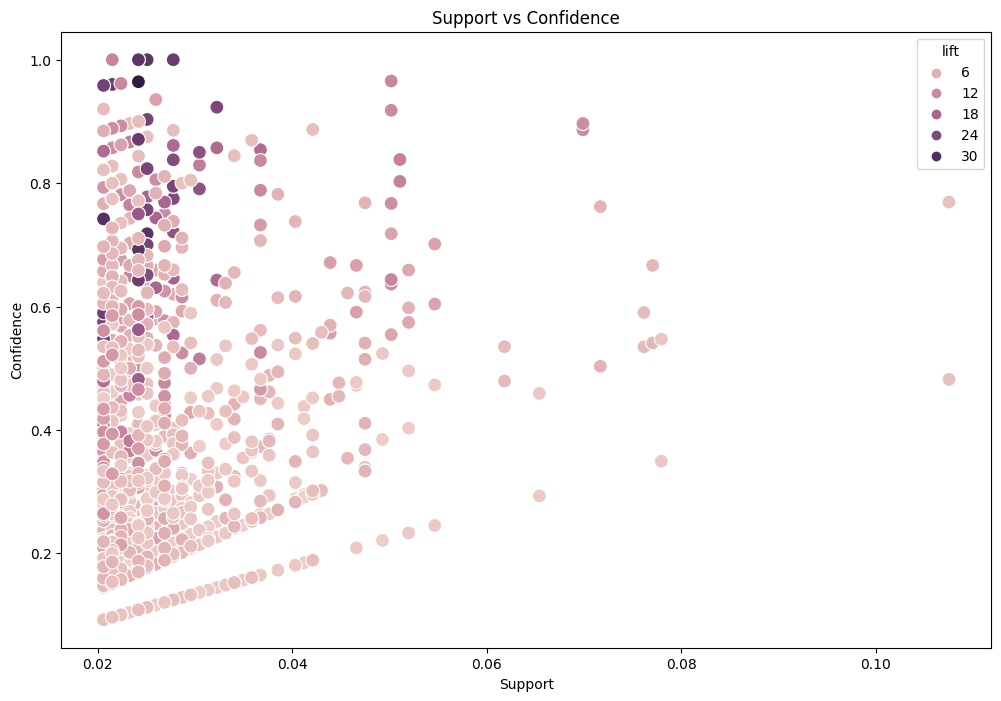

In [24]:
# [END OF]FREQUENT ITEMSETS - ASSOCIATION RULES - USING CONFIDENCE & LIFT

# Lets visualize the data above ^ with a scatter plot visualization displaying how
# the support, confidence, and lift vary.

plt.figure(figsize = (12, 8))

sns.scatterplot(x = assoc_rules["support"], 
                y = assoc_rules["confidence"], 
                hue = assoc_rules["lift"], s = 100)
        
plt.title("Support vs Confidence")

plt.xlabel("Support")
plt.ylabel("Confidence")


In [25]:
# [START OF: RECOMMENDING TOP 5 PRODUCTS]

# the antecedents and consequents specified within the association ruels are a type of frozenset
# this mean we can use a set of operations to look for patterns in the data 

type(assoc_rules["antecedents"][0])

frozenset

In [26]:
# For example if I wanted to look as those association rules where the antecedents include SPACEBOY CHILDREN BOWL,
# this is how I performed that filtering operations

assoc_rules[assoc_rules["antecedents"] == {"SPACEBOY CHILDRENS BOWL"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
128,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS BOWL),0.050179,0.037634,0.032258,0.642857,17.081633,0.030370,2.694624,0.991195
134,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.050179,0.034946,0.027778,0.553571,15.840659,0.026024,2.161720,0.986366
578,(SPACEBOY CHILDRENS BOWL),(ROUND SNACK BOXES SET OF4 WOODLAND),0.050179,0.223118,0.029570,0.589286,2.641136,0.018374,1.891538,0.654202
612,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.050179,0.043011,0.036738,0.732143,17.022321,0.034580,3.572760,0.990980
681,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.050179,0.032258,0.027778,0.553571,17.160714,0.026159,2.167742,0.991479
693,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS BOWL, ROUND SNACK BOXES SET OF4 WOODLAND)",0.050179,0.021505,0.020609,0.410714,19.098214,0.019530,1.660476,0.997703
699,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",0.050179,0.025090,0.024194,0.482143,19.216837,0.022935,1.882586,0.998043
705,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP)",0.050179,0.027778,0.024194,0.482143,17.357143,0.022800,1.877395,0.992173
1095,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, ROUND SNACK BOXES SET OF4 WOODLAND)",0.050179,0.024194,0.020609,0.410714,16.976190,0.019395,1.655914,0.990812
1114,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP)",0.050179,0.025090,0.024194,0.482143,19.216837,0.022935,1.882586,0.998043


In [27]:
assoc_rules[assoc_rules["antecedents"] == {"DOLLY GIRL CHILDRENS CUP", "SPACEBOY CHILDRENS CUP"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
686,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.025090,0.903226,24.000000,0.024044,9.944444,0.985714
704,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP)",(SPACEBOY CHILDRENS BOWL),0.027778,0.050179,0.024194,0.870968,17.357143,0.022800,7.361111,0.969312
1111,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS BOWL)",0.027778,0.032258,0.024194,0.870968,27.000000,0.023297,7.500000,0.990476


In [28]:
assoc_rules[assoc_rules["consequents"] == {"ALARM CLOCK BAKELIKE RED"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.026882,0.069892,0.021505,0.800000,11.446154,0.019627,4.650538,0.937845
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.065412,0.069892,0.050179,0.767123,10.975764,0.045607,3.993991,0.972504
12,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.028674,0.069892,0.022401,0.781250,11.177885,0.020397,4.251920,0.937417
14,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.078853,0.069892,0.046595,0.590909,8.454545,0.041084,2.273596,0.957198
26,(PLASTERS IN TIN SPACEBOY),(ALARM CLOCK BAKELIKE RED),0.115591,0.069892,0.020609,0.178295,2.550984,0.012530,1.131923,0.687459
29,(ROUND SNACK BOXES SET OF4 WOODLAND),(ALARM CLOCK BAKELIKE RED),0.223118,0.069892,0.036738,0.164659,2.355885,0.021144,1.113446,0.740822
31,(SPACEBOY LUNCH BOX),(ALARM CLOCK BAKELIKE RED),0.142473,0.069892,0.025090,0.176101,2.519594,0.015132,1.128909,0.703314
624,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED),0.043907,0.069892,0.036738,0.836735,11.971743,0.033670,5.696909,0.958557
637,"(ALARM CLOCK BAKELIKE GREEN, ROUND SNACK BOXES SET OF4 WOODLAND)",(ALARM CLOCK BAKELIKE RED),0.029570,0.069892,0.024194,0.818182,11.706294,0.022127,5.115591,0.942444
643,"(ALARM CLOCK BAKELIKE PINK, ROUND SNACK BOXES SET OF4 WOODLAND)",(ALARM CLOCK BAKELIKE RED),0.032258,0.069892,0.024194,0.750000,10.730769,0.021939,3.720430,0.937037


In [29]:
assoc_rules[assoc_rules["consequents"] == {"DOLLY GIRL CHILDRENS CUP", "DOLLY GIRL CHILDRENS BOWL"}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
681,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.050179,0.032258,0.027778,0.553571,17.160714,0.026159,2.167742,0.991479
689,(SPACEBOY CHILDRENS CUP),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.043011,0.032258,0.025090,0.583333,18.083333,0.023702,2.322581,0.987159
1109,"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)","(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.036738,0.032258,0.024194,0.658537,20.414634,0.023008,2.834101,0.987287


In [30]:
frequent_items = apriori(item_df, min_support = 0.01, use_colnames = True)

frequent_items

,support,itemsets
0,0.013441,( BIRTHDAY CARD)
1,0.010753,( RETRO SPOT)
2,0.026882,(10 COLOUR SPACEBOY PEN)
3,0.017025,(12 PENCIL SMALL TUBE WOODLAND)
4,0.013441,(12 PENCILS SMALL TUBE RED RETROSPOT)
...,...,...
3541,0.016129,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER CUPS, SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER PLATES)"
3542,0.010753,"(PLASTERS IN TIN STRONGMAN, PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF4 WOODLAND)"
3543,0.016129,"(PLASTERS IN TIN SPACEBOY, ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF4 WOODLAND)"
3544,0.012545,"(PLASTERS IN TIN STRONGMAN, ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF4 WOODLAND)"


In [31]:
assoc_rules = association_rules(frequent_items, metric = "support", min_threshold = 0.01)

assoc_rules.sort_values("support", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2971,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415,0.913841
2970,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487,0.825312
3051,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.142473,0.223118,0.077957,0.547170,2.452376,0.046169,1.715614,0.690628
3050,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051,0.762320
2450,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.142473,0.115591,0.077061,0.540881,4.679245,0.060592,1.926315,0.916928
...,...,...,...,...,...,...,...,...,...,...
36,(36 PENCILS TUBE RED RETROSPOT),(ROUND SNACK BOXES SET OF4 WOODLAND),0.033154,0.223118,0.010753,0.324324,1.453598,0.003355,1.149785,0.322753
37,(ROUND SNACK BOXES SET OF4 WOODLAND),(36 PENCILS TUBE RED RETROSPOT),0.223118,0.033154,0.010753,0.048193,1.453598,0.003355,1.015800,0.401672
38,(36 PENCILS TUBE WOODLAND),(ROUND SNACK BOXES SET OF4 WOODLAND),0.023297,0.223118,0.010753,0.461538,2.068582,0.005555,1.442780,0.528899
39,(ROUND SNACK BOXES SET OF4 WOODLAND),(36 PENCILS TUBE WOODLAND),0.223118,0.023297,0.010753,0.048193,2.068582,0.005555,1.026156,0.664937


In [32]:
round_snack_boxes_antecedent = assoc_rules[assoc_rules["antecedents"] == {"ROUND SNACK BOXES SET OF4 WOODLAND"}]

round_snack_boxes_antecedent = round_snack_boxes_antecedent.sort_values("support", ascending = False).head(5)

round_snack_boxes_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2971,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415,0.913841
3050,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051,0.762320
2573,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.223118,0.142473,0.065412,0.293173,2.057740,0.033624,1.213206,0.661658
2479,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN SPACEBOY),0.223118,0.115591,0.054659,0.244980,2.119361,0.028869,1.171371,0.679846
3079,(ROUND SNACK BOXES SET OF4 WOODLAND),(WOODLAND CHARLOTTE BAG),0.223118,0.104839,0.051971,0.232932,2.221810,0.028580,1.166990,0.707851


Text(0, 0.5, 'Recommended Items')

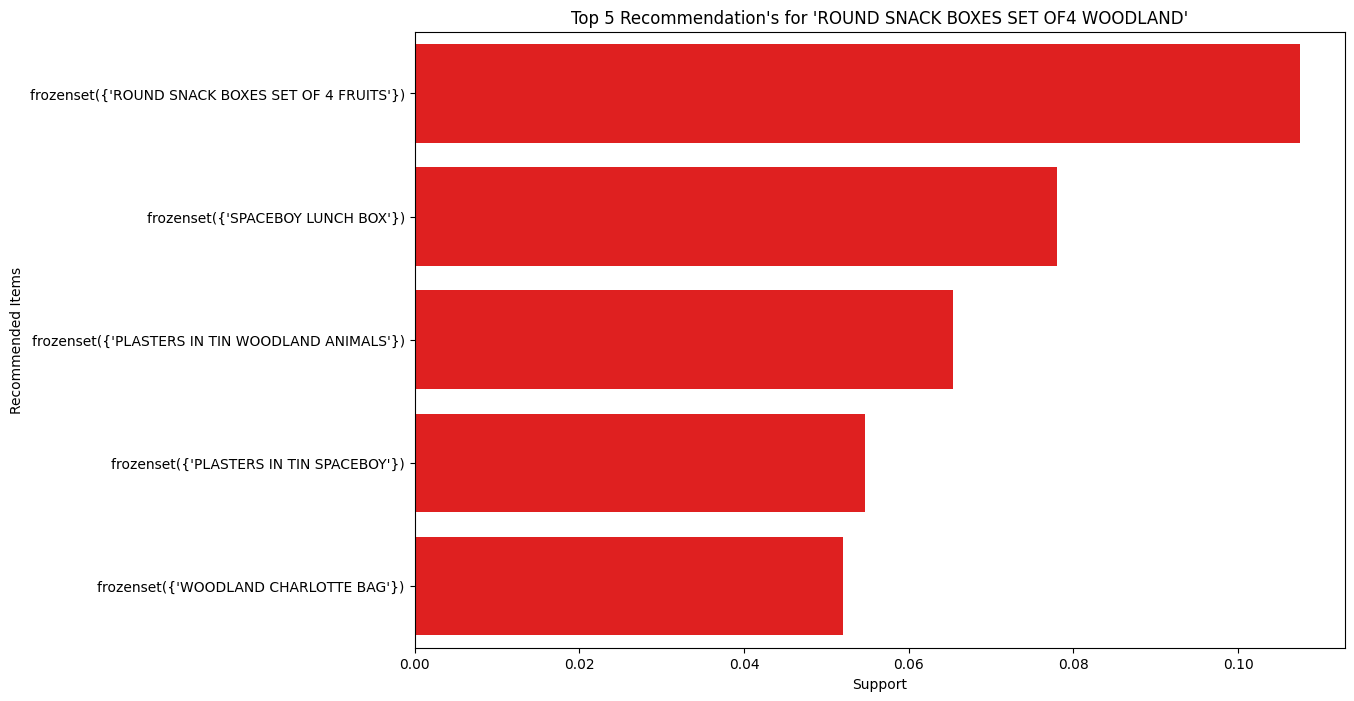

In [33]:
# [END OF: RECOMMENDING TOP 5 PRODUCTS]

plt.figure(figsize = [12, 8])

x = sns.barplot(x = "support", y = "consequents", data = round_snack_boxes_antecedent, color = "red")

plt.title("Top 5 Recommendation's for 'ROUND SNACK BOXES SET OF4 WOODLAND'")
plt.xlabel("Support")
plt.ylabel("Recommended Items")